<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2024/blob/main/Module_6/22_RL_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2024 course "Introduction to ML for Materials Science"
- Instructor: Sergei V. Kalinin
- Built with the ChatGPT

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


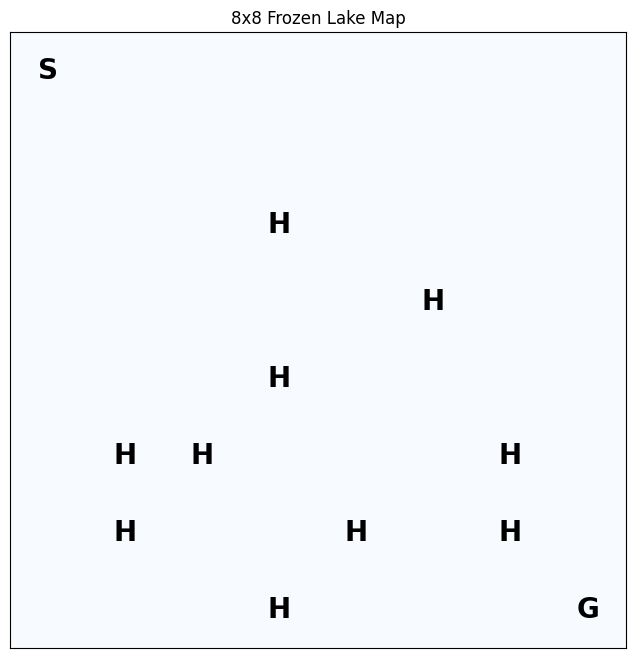

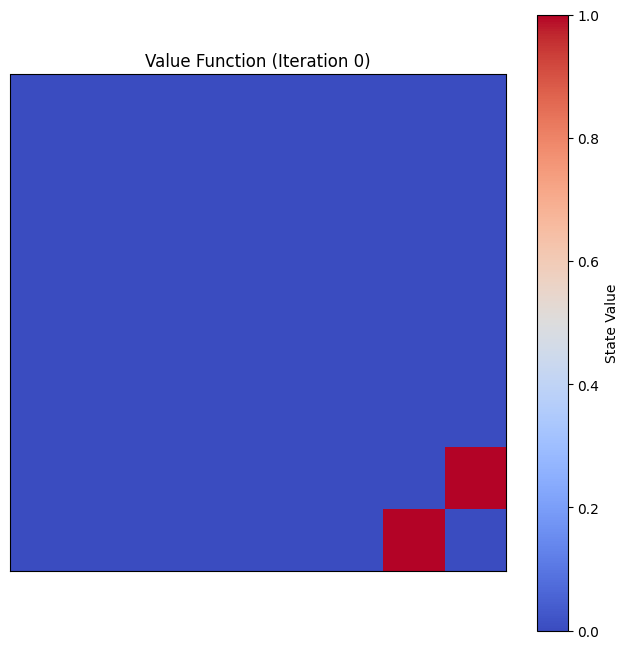

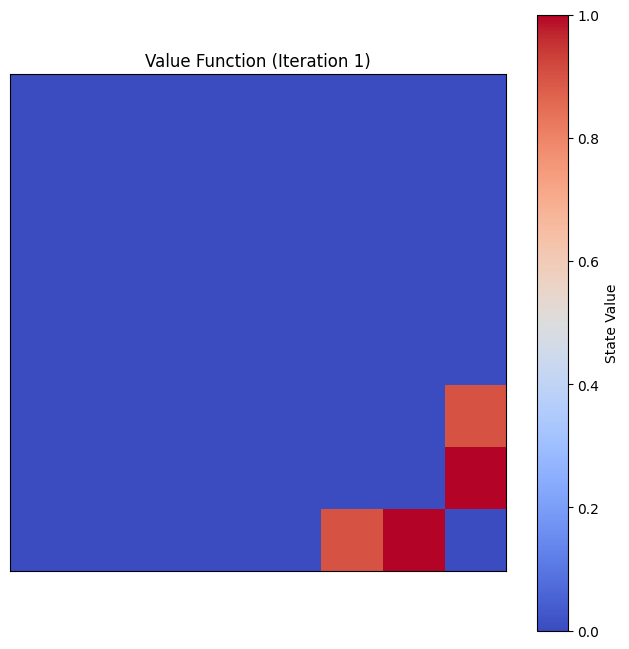

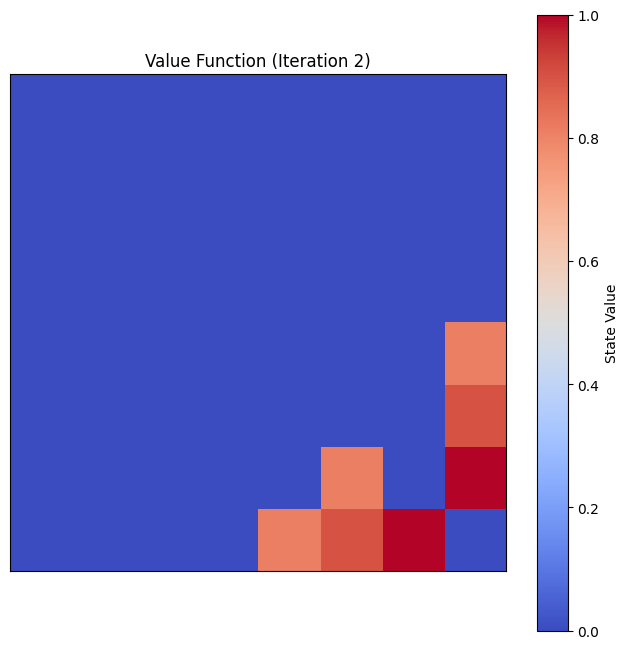

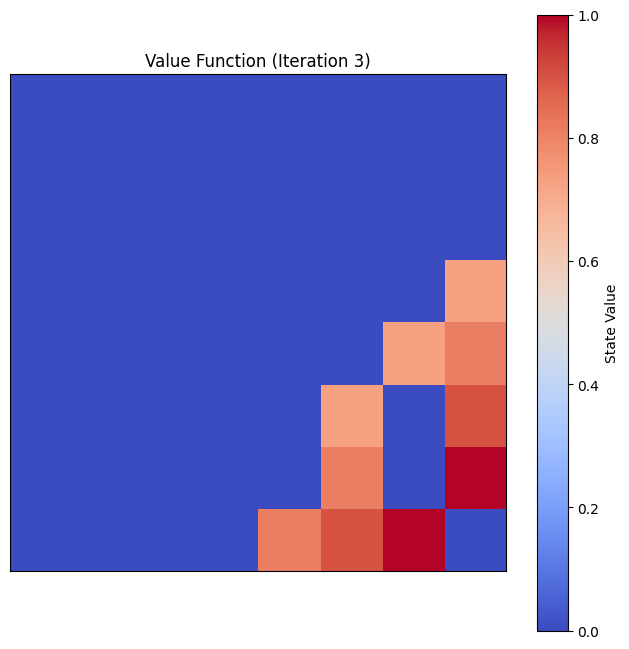

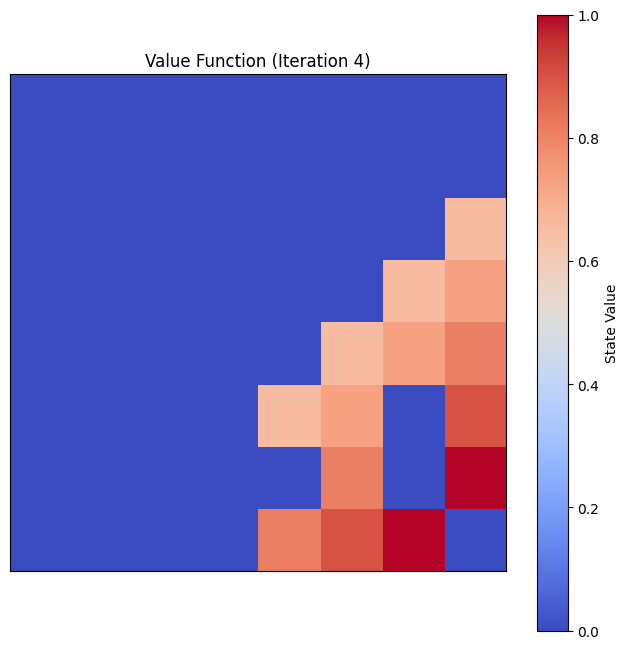

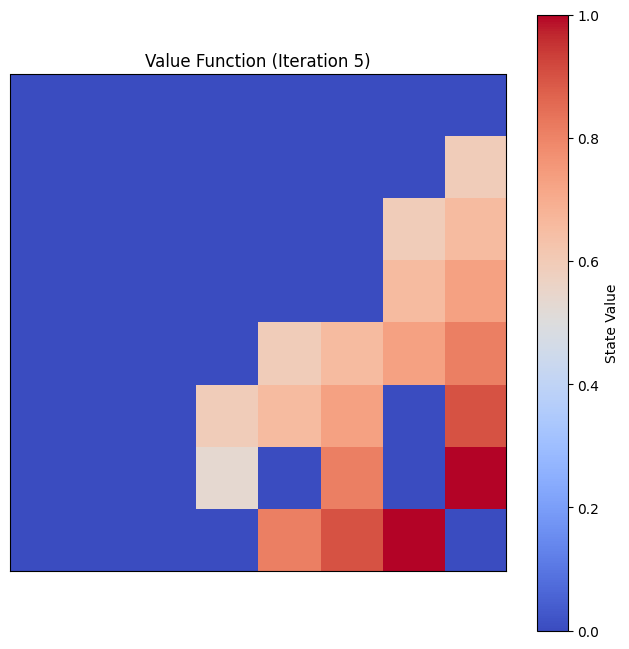

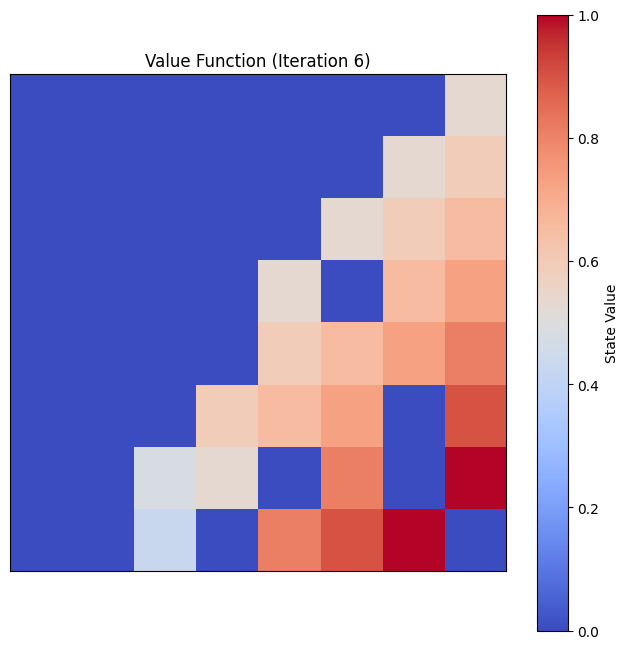

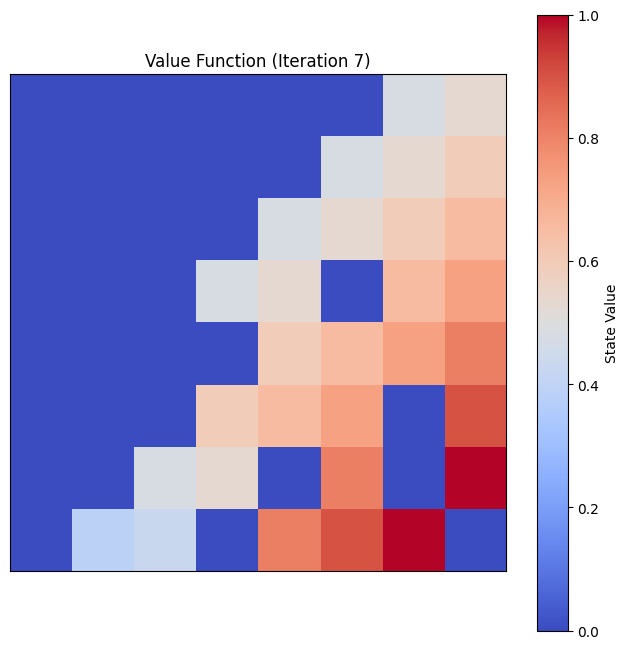

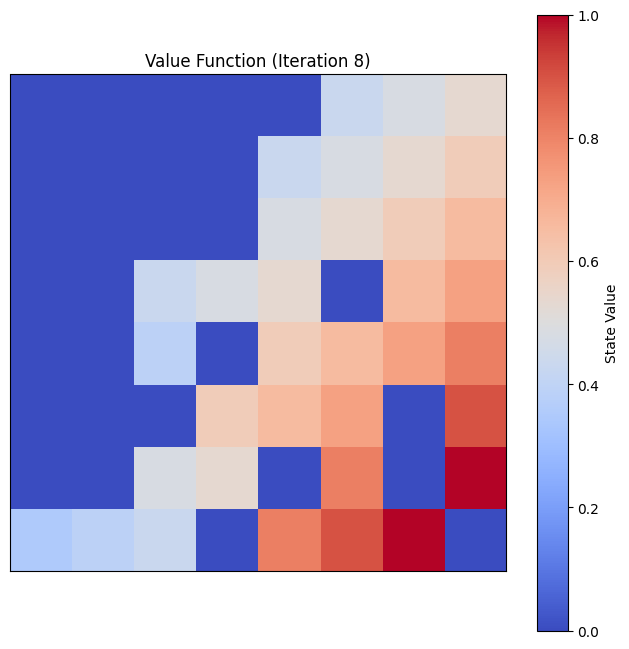

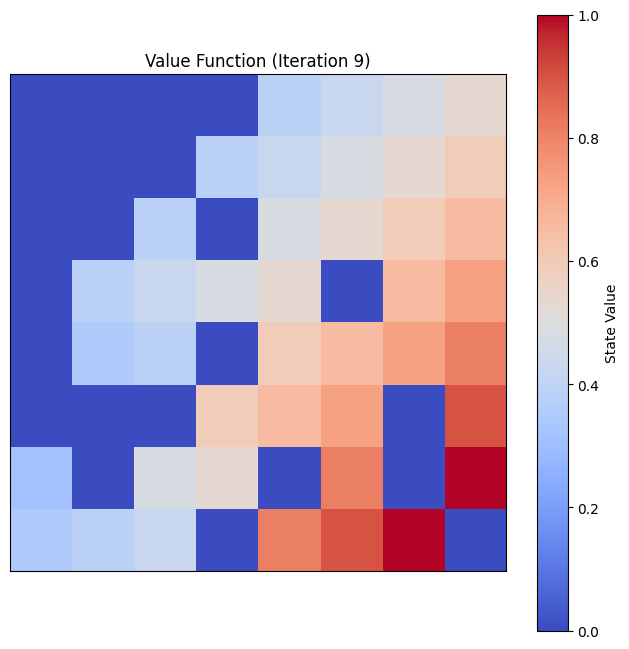

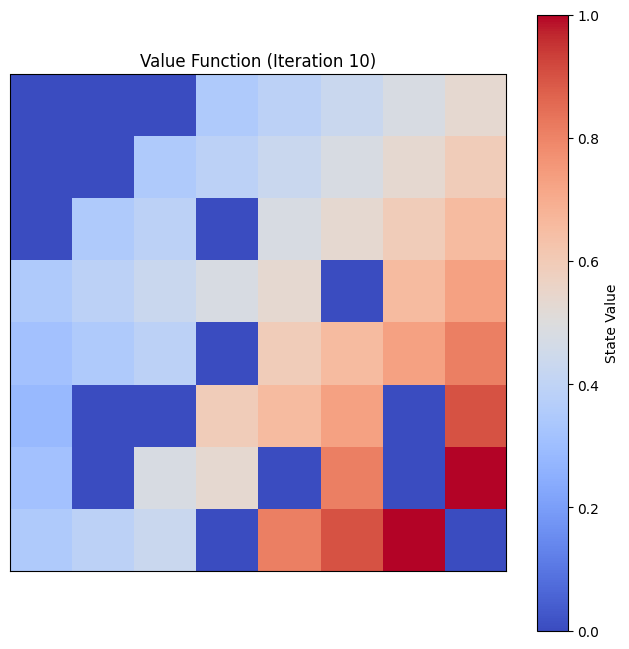

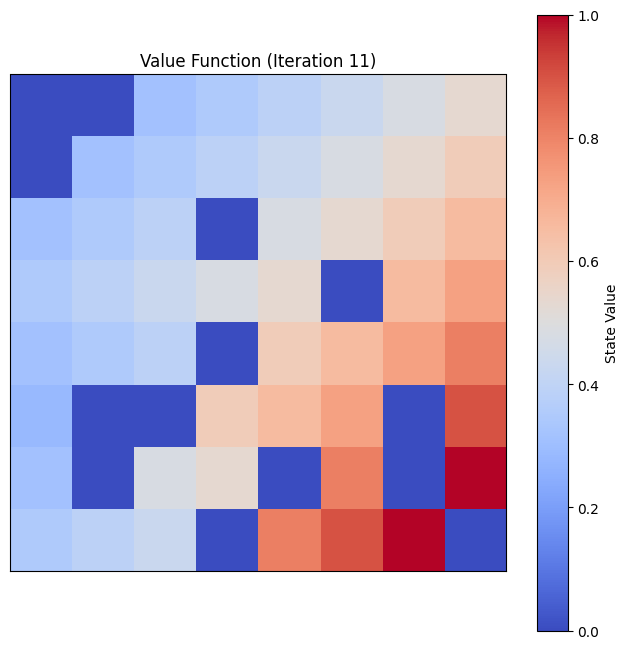

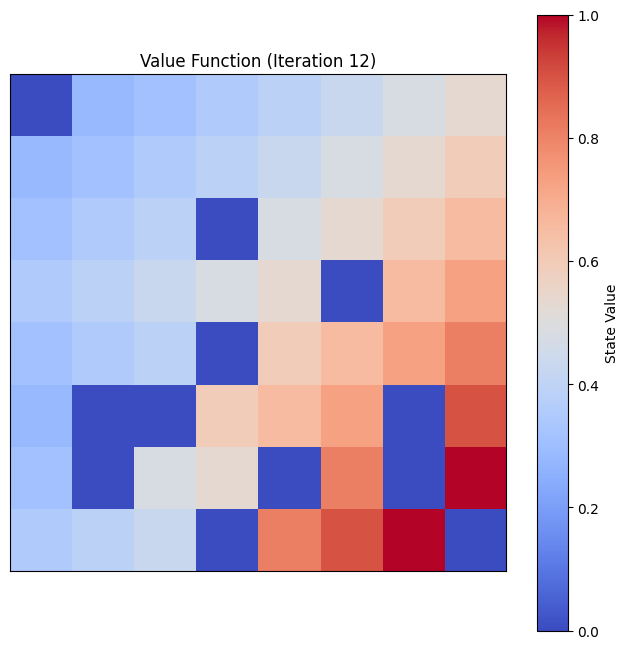

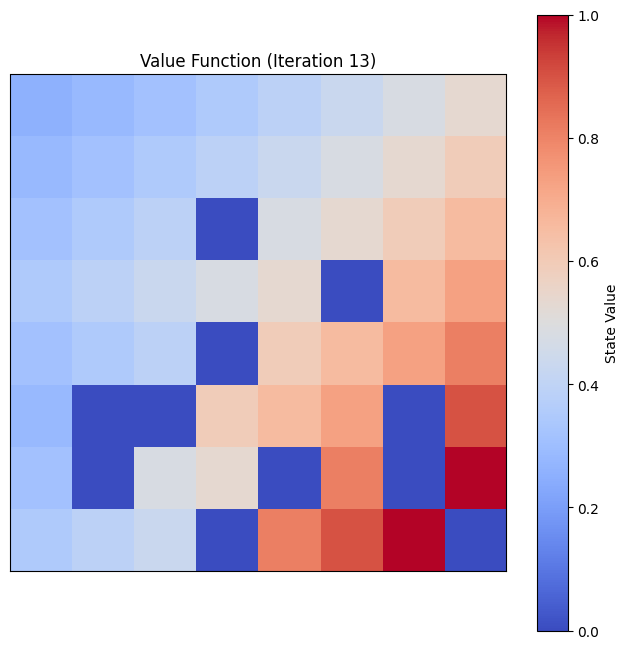

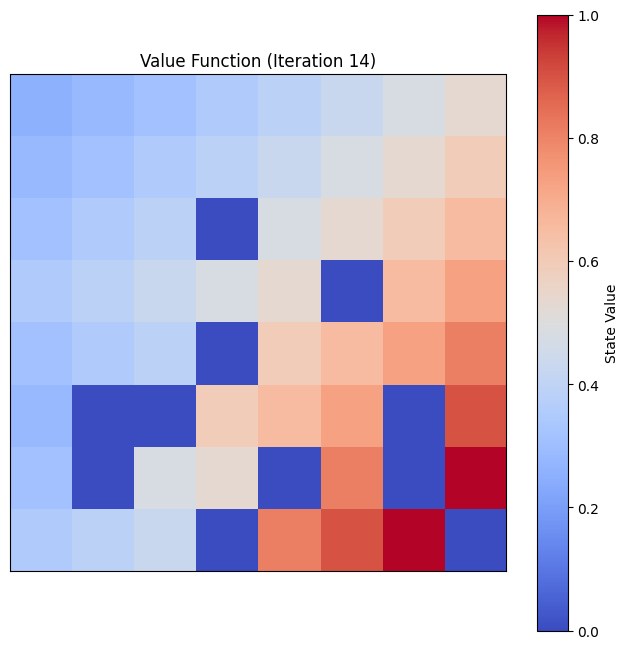

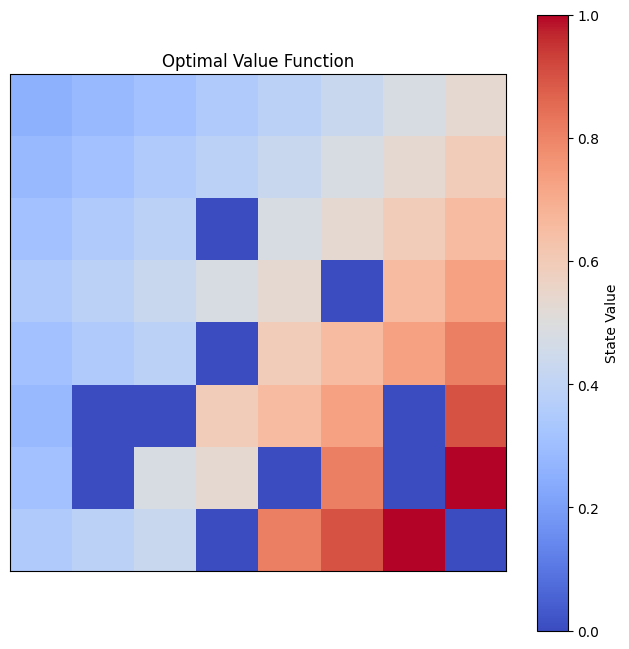

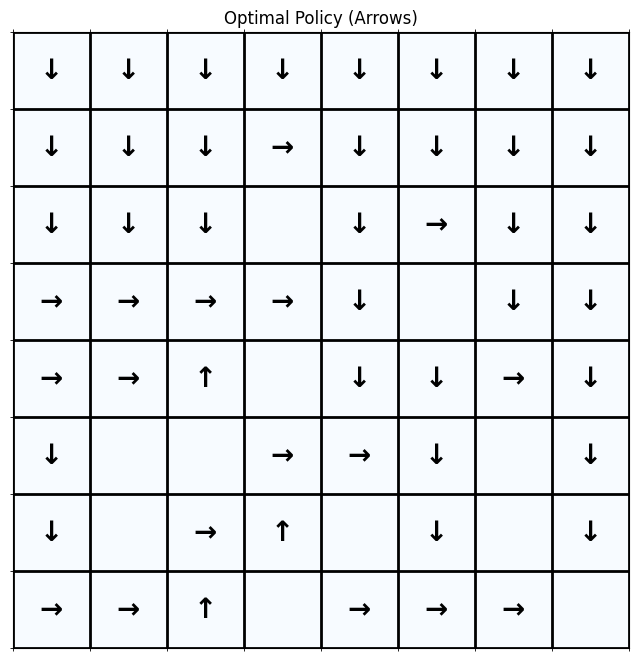

Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):
[[1 1 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1]
 [1 1 1 0 1 2 1 1]
 [2 2 2 2 1 0 1 1]
 [2 2 3 0 1 1 2 1]
 [1 0 0 2 2 1 0 1]
 [1 0 2 3 0 1 0 1]
 [2 2 3 0 2 2 2 0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

# Load the 8x8 Frozen Lake environment (slippery version)
env = gym.make("FrozenLake-v1", is_slippery=False, map_name="8x8")

# Value Iteration parameters
gamma = 0.9  # Discount factor
theta = 1e-6  # Threshold for stopping value iteration
n_states = env.observation_space.n  # Number of states
n_actions = env.action_space.n  # Number of actions

# Initialize the value function to zero
V = np.zeros(n_states)

# Function to plot the Frozen Lake map with symbols (S, G, H)
def plot_frozen_lake_map():
    lake_map = np.array([list(row) for row in env.desc])  # No need to decode
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a grid with the symbols (S, G, H)
    ax.matshow(np.zeros(lake_map.shape), cmap='Blues')  # Background color

    # Place the symbols in the grid (Exclude 'F')
    for i in range(lake_map.shape[0]):
        for j in range(lake_map.shape[1]):
            symbol = lake_map[i, j].decode("utf-8")  # Decode the bytestring
            if symbol in ['S', 'G', 'H']:  # Skip 'F'
                ax.text(j, i, symbol, va='center', ha='center', fontsize=20, weight='bold')

    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks
    plt.title("8x8 Frozen Lake Map")
    plt.show()

# Function to plot the value function as a heatmap
def plot_value_function(V, title="Value Function", iteration=None):
    plt.figure(figsize=(8, 8))
    grid_values = V.reshape((8, 8))  # Reshape to an 8x8 grid for Frozen Lake
    plt.imshow(grid_values, cmap='coolwarm', origin='upper')
    plt.colorbar(label='State Value')
    plt.title(f"{title} (Iteration {iteration})" if iteration is not None else title)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.show()

# Function to plot the optimal policy as an arrow map
def plot_policy(policy):
    lake_map = np.array([list(row) for row in env.desc])  # No need to decode
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a grid with background color
    ax.matshow(np.zeros(lake_map.shape), cmap='Blues')  # Background color

    # Arrows for policy: (0=Left, 1=Down, 2=Right, 3=Up)
    arrows = {0: '←', 1: '↓', 2: '→', 3: '↑'}

    # Place arrows based on the optimal policy, excluding 'H' (holes) and 'G' (goal)
    for i in range(lake_map.shape[0]):
        for j in range(lake_map.shape[1]):
            s = i * lake_map.shape[1] + j
            symbol = lake_map[i, j].decode("utf-8")
            if symbol in ['S', 'F']:  # 'S' and 'F' get policy arrows
                ax.text(j, i, arrows[policy[s]], va='center', ha='center', fontsize=20, weight='bold')

    # Add grid lines
    ax.set_xticks(np.arange(-0.5, lake_map.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, lake_map.shape[0], 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks
    plt.title("Optimal Policy (Arrows)")
    plt.show()

# Value Iteration Algorithm
def value_iteration(env, gamma, theta):
    V = np.zeros(n_states)  # Initialize value function
    iteration = 0
    while True:
        delta = 0
        for s in range(n_states):
            # For each state, compute the value function using Bellman optimality equation
            v = V[s]
            # Update the value with the maximum expected return over all actions
            V[s] = max(
                sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
                for a in range(n_actions)
            )
            delta = max(delta, abs(v - V[s]))

        # Plot the value function heatmap after each iteration
        plot_value_function(V, iteration=iteration)
        iteration += 1

        # Stop if the value function changes less than theta
        if delta < theta:
            break

    # Extract the optimal policy
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        policy[s] = np.argmax([
            sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
            for a in range(n_actions)
        ])

    return policy, V

# Plot the initial Frozen Lake map
plot_frozen_lake_map()

# Run Value Iteration
optimal_policy, optimal_value_function = value_iteration(env, gamma, theta)

# Plot the final value function
plot_value_function(optimal_value_function, title="Optimal Value Function")

# Plot the optimal policy as an arrow map
plot_policy(optimal_policy)

print("Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):")
print(optimal_policy.reshape((8, 8)))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


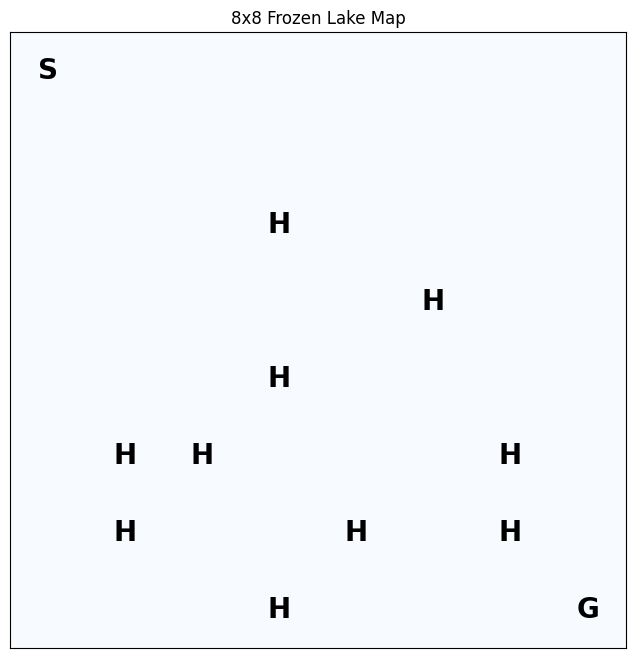

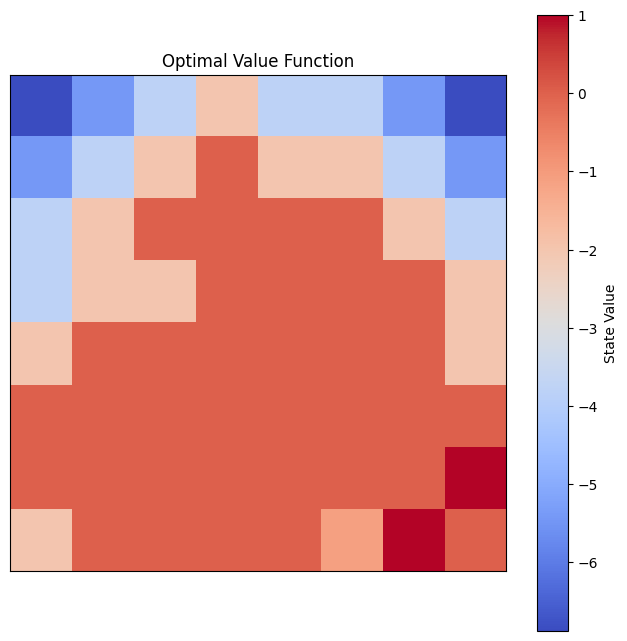

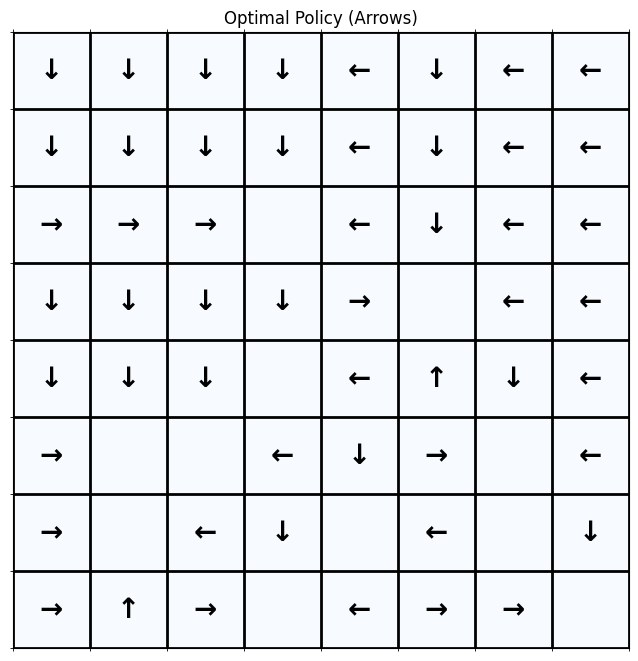

Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):
[[1 1 1 1 0 1 0 0]
 [1 1 1 1 0 1 0 0]
 [2 2 2 0 0 1 0 0]
 [1 1 1 1 2 0 0 0]
 [1 1 1 0 0 3 1 0]
 [2 0 0 0 1 2 0 0]
 [2 0 0 1 0 0 0 1]
 [2 3 2 0 0 2 2 0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

# Customize the step reward (e.g., -0.04 for each step)
step_reward = -2 #-0.04

# Function to set up the Frozen Lake environment with a customizable step reward
def create_frozen_lake_env(step_reward=0):
    env = gym.make("FrozenLake-v1", is_slippery=False, map_name="8x8")

    # Modify the rewards: adjust step reward (for all transitions except goal and hole)
    for s in env.env.P:
        for a in env.env.P[s]:
            for i, (p, s_, r, done) in enumerate(env.env.P[s][a]):
                if done and r == 1:  # Reaching the goal
                    env.env.P[s][a][i] = (p, s_, 1, done)  # Reward for reaching the goal remains 1
                elif done and r == 0:  # Falling into a hole
                    env.env.P[s][a][i] = (p, s_, 0, done)  # Reward for falling into a hole remains 0
                else:  # Regular steps receive the specified step reward
                    env.env.P[s][a][i] = (p, s_, step_reward, done)

    return env

# Value Iteration parameters
gamma = 0.9  # Discount factor
theta = 1e-6  # Threshold for stopping value iteration
n_states = 64  # Number of states (8x8 grid)
n_actions = 4  # Number of actions

# Function to plot the Frozen Lake map with symbols (S, G, H)
def plot_frozen_lake_map(env):
    lake_map = np.array([list(row) for row in env.desc])  # No need to decode
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a grid with the symbols (S, G, H)
    ax.matshow(np.zeros(lake_map.shape), cmap='Blues')  # Background color

    # Place the symbols in the grid (Exclude 'F')
    for i in range(lake_map.shape[0]):
        for j in range(lake_map.shape[1]):
            symbol = lake_map[i, j].decode("utf-8")  # Decode the bytestring
            if symbol in ['S', 'G', 'H']:  # Skip 'F'
                ax.text(j, i, symbol, va='center', ha='center', fontsize=20, weight='bold')

    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks
    plt.title("8x8 Frozen Lake Map")
    plt.show()

# Function to plot the value function as a heatmap
def plot_value_function(V, title="Value Function", iteration=None):
    plt.figure(figsize=(8, 8))
    grid_values = V.reshape((8, 8))  # Reshape to an 8x8 grid for Frozen Lake
    plt.imshow(grid_values, cmap='coolwarm', origin='upper')
    plt.colorbar(label='State Value')
    plt.title(f"{title} (Iteration {iteration})" if iteration is not None else title)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.show()

# Function to plot the optimal policy as an arrow map
def plot_policy(policy, env):
    lake_map = np.array([list(row) for row in env.desc])  # No need to decode
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a grid with background color
    ax.matshow(np.zeros(lake_map.shape), cmap='Blues')  # Background color

    # Arrows for policy: (0=Left, 1=Down, 2=Right, 3=Up)
    arrows = {0: '←', 1: '↓', 2: '→', 3: '↑'}

    # Place arrows based on the optimal policy, excluding 'H' (holes) and 'G' (goal)
    for i in range(lake_map.shape[0]):
        for j in range(lake_map.shape[1]):
            s = i * lake_map.shape[1] + j
            symbol = lake_map[i, j].decode("utf-8")
            if symbol in ['S', 'F']:  # 'S' and 'F' get policy arrows
                ax.text(j, i, arrows[policy[s]], va='center', ha='center', fontsize=20, weight='bold')

    # Add grid lines
    ax.set_xticks(np.arange(-0.5, lake_map.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, lake_map.shape[0], 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks
    plt.title("Optimal Policy (Arrows)")
    plt.show()

# Value Iteration Algorithm
def value_iteration(env, gamma, theta):
    V = np.zeros(n_states)  # Initialize value function
    iteration = 0
    while True:
        delta = 0
        for s in range(n_states):
            # For each state, compute the value function using Bellman optimality equation
            v = V[s]
            # Update the value with the maximum expected return over all actions
            V[s] = max(
                sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
                for a in range(n_actions)
            )
            delta = max(delta, abs(v - V[s]))

        # Plot the value function heatmap after each iteration
        #plot_value_function(V, iteration=iteration)
        iteration += 1

        # Stop if the value function changes less than theta
        if delta < theta:
            break

    # Extract the optimal policy
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        policy[s] = np.argmax([
            sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
            for a in range(n_actions)
        ])

    return policy, V

# Create Frozen Lake environment with the specified step reward
env = create_frozen_lake_env(step_reward=step_reward)

# Plot the initial Frozen Lake map
plot_frozen_lake_map(env)

# Run Value Iteration
optimal_policy, optimal_value_function = value_iteration(env, gamma, theta)

# Plot the final value function
plot_value_function(optimal_value_function, title="Optimal Value Function")

# Plot the optimal policy as an arrow map
plot_policy(optimal_policy, env)

print("Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):")
print(optimal_policy.reshape((8, 8)))


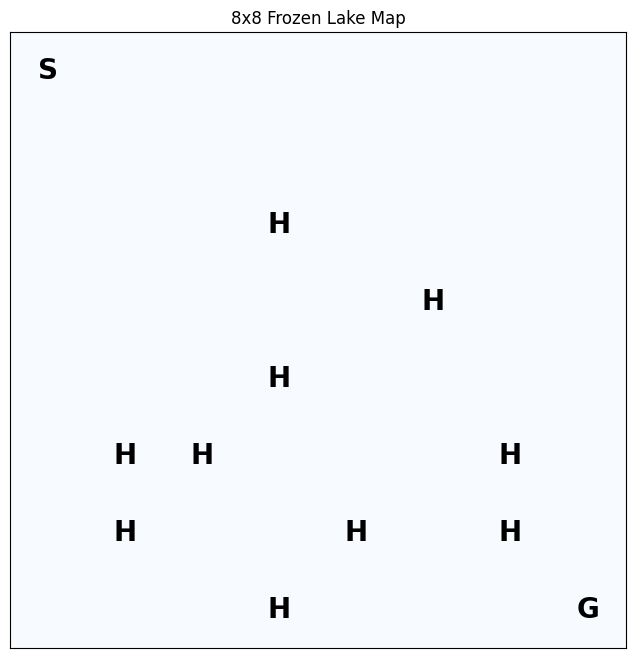

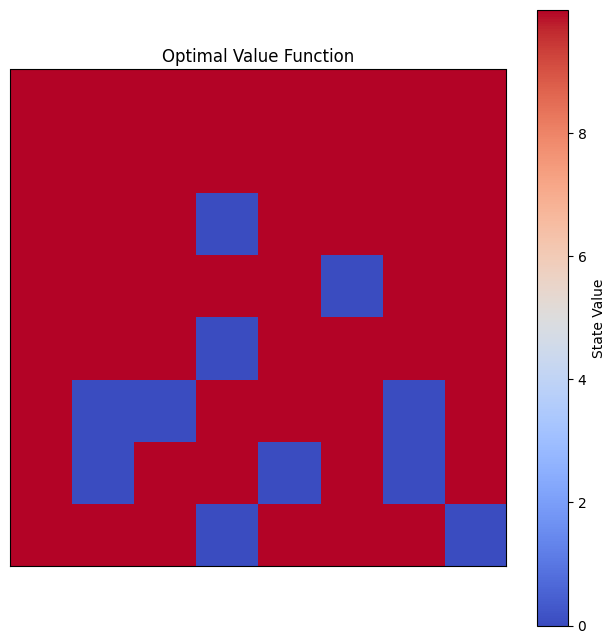

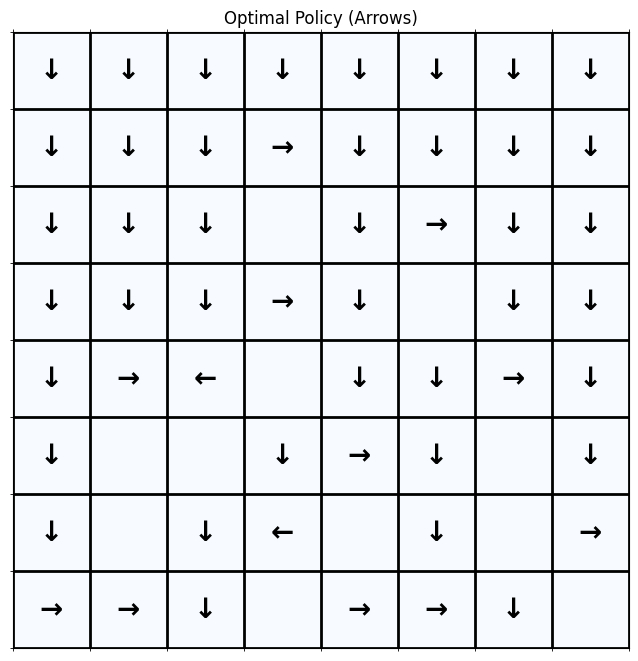

Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):
[[1 1 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1]
 [1 1 1 0 1 2 1 1]
 [1 1 1 2 1 0 1 1]
 [1 2 0 0 1 1 2 1]
 [1 0 0 1 2 1 0 1]
 [1 0 1 0 0 1 0 2]
 [2 2 1 0 2 2 1 0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

# Customize the step reward and slipperiness
step_reward = 1 #0.04 #-0.04
slipperiness = 0 #0.4 #0.2  # Slipperiness 0 means no slipping, 1 means equal chance to move in any direction

# Function to set up the Frozen Lake environment with customizable step reward and slipperiness
def create_frozen_lake_env(step_reward=0, slipperiness=0):
    env = gym.make("FrozenLake-v1", is_slippery=False, map_name="8x8")

    # Modify the rewards: adjust step reward (for all transitions except goal and hole)
    for s in env.env.P:
        for a in env.env.P[s]:
            for i, (p, s_, r, done) in enumerate(env.env.P[s][a]):
                if done and r == 1:  # Reaching the goal
                    env.env.P[s][a][i] = (p, s_, 1, done)  # Reward for reaching the goal remains 1
                elif done and r == 0:  # Falling into a hole
                    env.env.P[s][a][i] = (p, s_, 0, done)  # Reward for falling into a hole remains 0
                else:  # Regular steps receive the specified step reward
                    env.env.P[s][a][i] = (p, s_, step_reward, done)

    # Modify the environment's transition probabilities to account for slipperiness
    for s in env.env.P:
        for a in env.env.P[s]:
            transitions = env.env.P[s][a]
            if slipperiness > 0:
                intended_action_prob = 1 - slipperiness
                slip_prob = slipperiness / (len(transitions) if len(transitions) > 1 else 1)  # Handle transitions

                # Adjust the transition probabilities for slipperiness
                for i, (p, next_state, reward, done) in enumerate(transitions):
                    if i == 0:
                        env.env.P[s][a][i] = (intended_action_prob, next_state, reward, done)
                    else:
                        env.env.P[s][a][i] = (slip_prob, next_state, reward, done)

    return env

# Value Iteration parameters
gamma = 0.9  # Discount factor
theta = 1e-6  # Threshold for stopping value iteration
n_states = 64  # Number of states (8x8 grid)
n_actions = 4  # Number of actions

# Function to plot the Frozen Lake map with symbols (S, G, H)
def plot_frozen_lake_map(env):
    lake_map = np.array([list(row) for row in env.desc])  # No need to decode
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a grid with the symbols (S, G, H)
    ax.matshow(np.zeros(lake_map.shape), cmap='Blues')  # Background color

    # Place the symbols in the grid (Exclude 'F')
    for i in range(lake_map.shape[0]):
        for j in range(lake_map.shape[1]):
            symbol = lake_map[i, j].decode("utf-8")  # Decode the bytestring
            if symbol in ['S', 'G', 'H']:  # Skip 'F'
                ax.text(j, i, symbol, va='center', ha='center', fontsize=20, weight='bold')

    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks
    plt.title("8x8 Frozen Lake Map")
    plt.show()

# Function to plot the value function as a heatmap
def plot_value_function(V, title="Value Function", iteration=None):
    plt.figure(figsize=(8, 8))
    grid_values = V.reshape((8, 8))  # Reshape to an 8x8 grid for Frozen Lake
    plt.imshow(grid_values, cmap='coolwarm', origin='upper')
    plt.colorbar(label='State Value')
    plt.title(f"{title} (Iteration {iteration})" if iteration is not None else title)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.show()

# Function to plot the optimal policy as an arrow map
def plot_policy(policy, env):
    lake_map = np.array([list(row) for row in env.desc])  # No need to decode
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a grid with background color
    ax.matshow(np.zeros(lake_map.shape), cmap='Blues')  # Background color

    # Arrows for policy: (0=Left, 1=Down, 2=Right, 3=Up)
    arrows = {0: '←', 1: '↓', 2: '→', 3: '↑'}

    # Place arrows based on the optimal policy, excluding 'H' (holes) and 'G' (goal)
    for i in range(lake_map.shape[0]):
        for j in range(lake_map.shape[1]):
            s = i * lake_map.shape[1] + j
            symbol = lake_map[i, j].decode("utf-8")
            if symbol in ['S', 'F']:  # 'S' and 'F' get policy arrows
                ax.text(j, i, arrows[policy[s]], va='center', ha='center', fontsize=20, weight='bold')

    # Add grid lines
    ax.set_xticks(np.arange(-0.5, lake_map.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, lake_map.shape[0], 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks
    plt.title("Optimal Policy (Arrows)")
    plt.show()

# Value Iteration Algorithm
def value_iteration(env, gamma, theta):
    V = np.zeros(n_states)  # Initialize value function
    iteration = 0
    while True:
        delta = 0
        for s in range(n_states):
            # For each state, compute the value function using Bellman optimality equation
            v = V[s]
            # Update the value with the maximum expected return over all actions
            V[s] = max(
                sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
                for a in range(n_actions)
            )
            delta = max(delta, abs(v - V[s]))

        # Plot the value function heatmap after each iteration
        # plot_value_function(V, iteration=iteration)
        iteration += 1

        # Stop if the value function changes less than theta
        if delta < theta:
            break

    # Extract the optimal policy
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        policy[s] = np.argmax([
            sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
            for a in range(n_actions)
        ])

    return policy, V

# Create Frozen Lake environment with the specified step reward and slipperiness
env = create_frozen_lake_env(step_reward=step_reward, slipperiness=slipperiness)

# Plot the initial Frozen Lake map
plot_frozen_lake_map(env)

# Run Value Iteration
optimal_policy, optimal_value_function = value_iteration(env, gamma, theta)

# Plot the final value function
plot_value_function(optimal_value_function, title="Optimal Value Function")

# Plot the optimal policy as an arrow map
plot_policy(optimal_policy, env)

print("Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):")
print(optimal_policy.reshape((8, 8)))
